# Linear Regression

In simple linear regression, there is a relationship between a single independent variable (X) and a dependent variable (Y). The model tries to fit a straight line (linear) to predict the value of the dependent variable based on the independent variable.

## Steps in SLR

### Import all Libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # This will suppress all warnings

In [178]:
data=pd.read_csv('data/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Data Preprocessing

In [180]:
data.describe

<bound method NDFrame.describe of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [182]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [183]:
data.size

60

In [184]:
data.shape

(30, 2)

In [185]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [186]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [187]:
data.duplicated().sum()

0

### Correlation Analysis

In [189]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


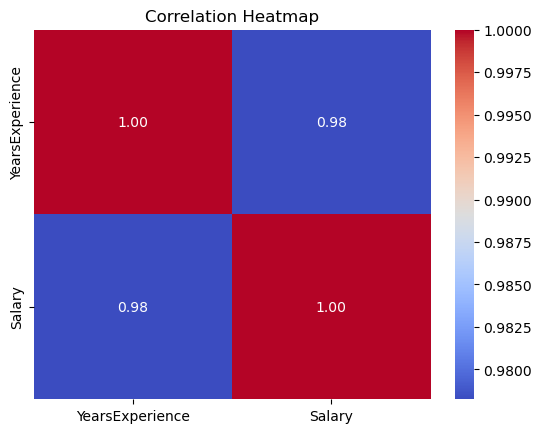

In [190]:
# correlation analysis
correlation_matrix = data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data Visualization

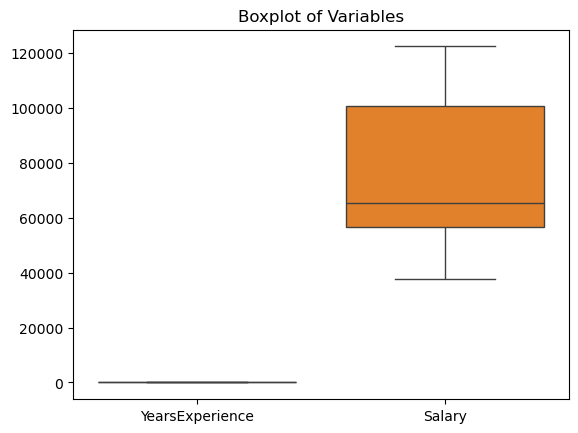

In [192]:
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

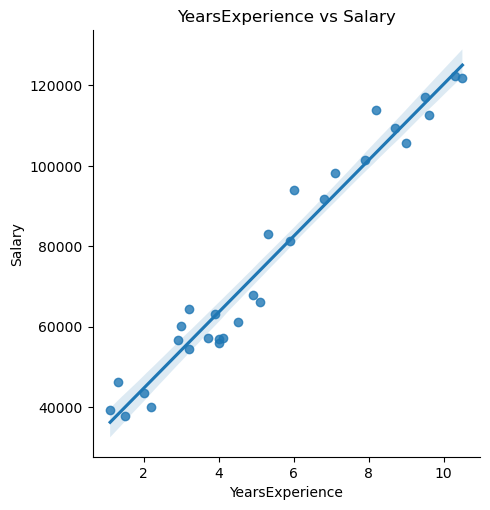

In [193]:
sns.lmplot(x='YearsExperience', y='Salary', data=data)
plt.title('YearsExperience vs Salary')
plt.show()

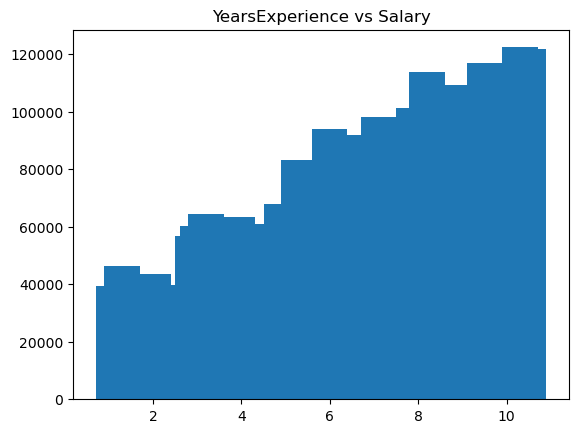

In [194]:
plt.bar(data['YearsExperience'], data['Salary'])
plt.title('YearsExperience vs Salary')
plt.show()

### Spliting the Data into Input(X) & Target(Y) variables

In [196]:
X = data.iloc[:, :1].values  # Extracts the first column, 'YearsExperience'
Y = data.iloc[:, 1].values   # Extracts the second column, 'Salary'

# Y=data['Salary']           #you can use this method too

### Spliting data into test data & train data

train_test-split() is used to split data into test data & train data

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

### Linear Regression Modeling

lr is the object of LinearRegression(). fit() is used to train the model.

In [203]:
from sklearn.linear_model import LinearRegression

In [204]:
lr=LinearRegression()

In [205]:
lr.fit(x_train,y_train)

LinearRegression()

### Predictions

predict() is used to do the predictions

In [208]:
y_pred=lr.predict(x_test)
y_pred

array([ 36143.62176044,  34237.05465324,  66648.69547576,  59022.42704693,
        91434.06786946,  80947.94877982, 101920.1869591 ,  52349.44217171,
        42816.60663567])

### Model Coefficients and Intercept

In [210]:
print("Coefficient:",lr.coef_) #m
print("Intercept:",lr.intercept_) #C
# Y=mX+C

Coefficient: [9532.83553604]
Intercept: 23750.935563594983


### Visualization of Actual & Predicted Values

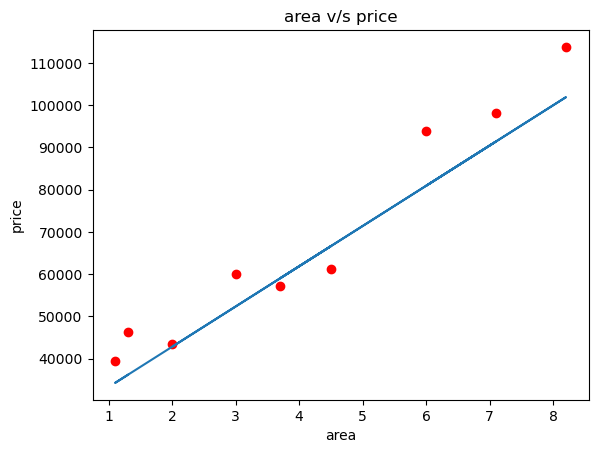

In [212]:
plt.scatter(x_test, y_test, color='red')
plt.title('area v/s price')
plt.xlabel('area')
plt.ylabel('price')

plt.plot(x_test,y_pred)
plt.show()

### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [214]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

6974.4659659190165
64406629.385259666
8025.374096281099


### Creating DataFrame to view Results

In [216]:
Results=pd.DataFrame(columns=['Actual_Salary','Predicted_Salary'])
Results['Actual_Salary']=y_test
Results['Predicted_Salary']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

,index,Actual_Salary,Predicted_Salary,Id
0,0,46205.0,36143.621760,0
1,1,39343.0,34237.054653,1
2,2,61111.0,66648.695476,2
3,3,57189.0,59022.427047,3
4,4,98273.0,91434.067869,4


### r2 value calculations

The 
𝑅
2
  value, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (predictors) in a regression model.

In the context of Multiple Linear Regression (MLR), the 
𝑅
2
  value indicates how well the model fits the data and how much of the variability in the dependent variable can be explained by the independent variables.

  R 
2
 =1− 
Total Sum of Squares (TSS)
Sum of Squared Residuals (SSR)
​


Where:

SSR (Sum of Squared Residuals): This measures the total squared difference between the predicted values and the actual values.
TSS (Total Sum of Squares): This measures the total squared difference between the actual values and their mean.

R² = 1 means the model perfectly predicts the target variable.
R² = 0 means the model doesn't explain any variance, and the predictions are no better than the mean of the target.
0 < R² < 1 means the model explains some, but not all, of the variance in the data.

In [220]:
from sklearn.metrics import r2_score

In [221]:
r2=r2_score(y_test,y_pred)
r2

0.9002142249159952

### Conclusion

The R-squared value (0.9002) is very high, indicating that approximately 90% of the variance in the actual salary values can be explained by the predicted salary values based on the features used in your regression model.
An R-squared value of 0.90 suggests a strong relationship between the independent variables and the dependent variable (Actual Salary). The model seems to perform well in predicting salaries based on the features included.

These differences between predicted and actual salaries demonstrate that, while the model is generally accurate, there are still some individual prediction errors.

Good Predictive Accuracy: Given the high R-squared value of 0.9002, the linear regression model appears to be quite effective in predicting salaries.

Minor Errors in Predictions: Some residual errors are noticeable (both overestimations and underestimations). These errors might be minimized with more sophisticated models or feature engineering.

Potential Areas for Improvement: If you wish to improve the model, you might consider testing different regression techniques (e.g., polynomial regression, ridge/lasso regression) or examining additional features to include in the model, especially if salary prediction is critical to your analysis.

In summary, your linear regression model is performing well with a high R-squared value, but it may still benefit from refinement and additional features to further reduce prediction errors.






In [225]:
# END